In [1]:
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from time import time

  
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"

In [39]:
match_url = base_url + "matches/{}/{}.json"
event_url = base_url + "events/{}.json"
comp_url = base_url + "competitions.json"
lineup_url = base_url + "lineups/{}.json"

match_id = 7580
#match_id = 7586
comp_id = 43
season_id = 3

In [40]:
fra_arg = requests.get(event_url.format(match_id)).json()
fifawc = requests.get(match_url.format(comp_id,season_id)).json()
lineup = requests.get(lineup_url.format(match_id)).json()


In [41]:
class Match:
    def __init__(self, events, competition, match_id, lineup):
        self.events = events
        self.competition = competition
        self.match_id = match_id
        self.lineup = lineup

In [42]:
start = time()
testmatch = Match(fra_arg, fifawc, 7580, lineup)
end = time()
end - start

0.0

In [43]:
home_formation = testmatch.events[0]['tactics']['formation']
away_formation = testmatch.events[1]['tactics']['formation']

In [44]:
from pitch import Pitch

In [70]:
n = 4
for i in range(n):
    print (i*60/n)

0.0
15.0
30.0
45.0


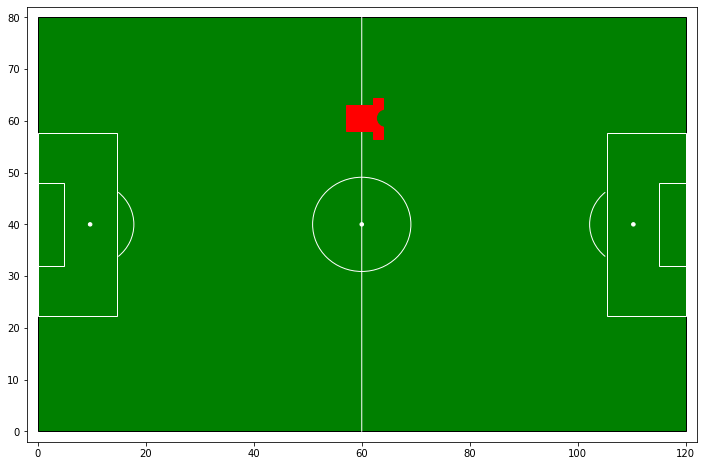

In [67]:
newpitch = Pitch()
newpitch.show()

In [46]:
testmatch.events[0]['tactics']['lineup']

[{'player': {'id': 3099, 'name': 'Hugo Lloris'},
  'position': {'id': 1, 'name': 'Goalkeeper'},
  'jersey_number': 1},
 {'player': {'id': 5476, 'name': 'Benjamin Pavard'},
  'position': {'id': 2, 'name': 'Right Back'},
  'jersey_number': 2},
 {'player': {'id': 5485, 'name': 'Raphaël Varane'},
  'position': {'id': 3, 'name': 'Right Center Back'},
  'jersey_number': 4},
 {'player': {'id': 5492, 'name': 'Samuel Yves Umtiti'},
  'position': {'id': 5, 'name': 'Left Center Back'},
  'jersey_number': 5},
 {'player': {'id': 5484, 'name': 'Lucas Hernández Pi'},
  'position': {'id': 6, 'name': 'Left Back'},
  'jersey_number': 21},
 {'player': {'id': 5487, 'name': 'Antoine Griezmann'},
  'position': {'id': 7, 'name': 'Right Wing Back'},
  'jersey_number': 7},
 {'player': {'id': 20004, 'name': 'Paul Pogba'},
  'position': {'id': 9, 'name': 'Right Defensive Midfield'},
  'jersey_number': 6},
 {'player': {'id': 3961, 'name': 'N"Golo Kanté'},
  'position': {'id': 11, 'name': 'Left Defensive Midfield'

In [52]:
len(testmatch.lineup[1]['lineup'])

14

In [71]:

lineup = []
for i in testmatch.events[1]['tactics']['lineup']:
    lineup.append([i['player']['name'], i['position']['name'], i['jersey_number']])


In [72]:
lineup

[['Franco Armani', 'Goalkeeper', 12],
 ['Gabriel Iván Mercado', 'Right Back', 2],
 ['Nicolás Hernán Otamendi', 'Right Center Back', 17],
 ['Faustino Marcos Alberto Rojo', 'Left Center Back', 16],
 ['Nicolás Alejandro Tagliafico', 'Left Back', 3],
 ['Javier Alejandro Mascherano', 'Center Defensive Midfield', 14],
 ['Enzo Nicolás Pérez', 'Right Center Midfield', 15],
 ['Éver Maximiliano David Banega', 'Left Center Midfield', 7],
 ['Ángel Fabián Di María Hernández', 'Right Wing', 11],
 ['Cristian David Pavón', 'Left Wing', 22],
 ['Lionel Andrés Messi Cuccittini', 'Center Forward', 10]]

In [ ]:
def myfunc(somelineup):
    for i in lineup:
        